In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns (if you need this)


In [3]:
# Importing data sets 
dataset = pd.read_csv('train.csv')


In [4]:
#Get Titles
titles = []
name = dataset['Name']
for na in name:
    name_lst = na.split(',')
    name_lst_2 = name_lst[1].split('.')
    name_lst_3 = name_lst_2[0]
    title = name_lst_3.replace("the", "").strip()  
    titles.append(title)
dataset["Titles"] = titles


In [5]:
#whether they had a cabin or not
cabin_presence = []
cabin = dataset['Cabin']
for cab in cabin:
    if pd.isna(cab):
        presence = 0
    else:
        presence = 1
    cabin_presence.append(presence)

dataset["Had_Cabin"] = cabin_presence

    

## Addressing missing age values
I saw that I had a few missing ages. This meant that I could not determine the is adult factor well because I had some null values.
I then realized that the Title Master was often given to children and not adults. With this in mind, I replaced the values for is_adult which were empty and had the title master with 0, which shows they are not adults, and the rest with one, which shows they were adults. 

In [6]:
#whether they are a child or an adult
#Replace the ones with age value
age_bracket = []
age = dataset['Age']
for ag in age:
    if ag < 18: #If the child age is below 18, they are NOT an adult
         bracket = 0
    elif ag > 18:
        bracket = 1
    else:
        bracket = "null"
    
    age_bracket.append(bracket)

#Leverage the information I gained about Master in Title analysis
dataset["is_adult"] = age_bracket
dataset['is_adult'] = np.where(
    (dataset['is_adult'] == 'null') & (dataset['Titles'] == 'Master'), 0,
    np.where((dataset['is_adult'] == 'null') & (dataset['Titles'] != 'Master'), 1, dataset['is_adult'])
)



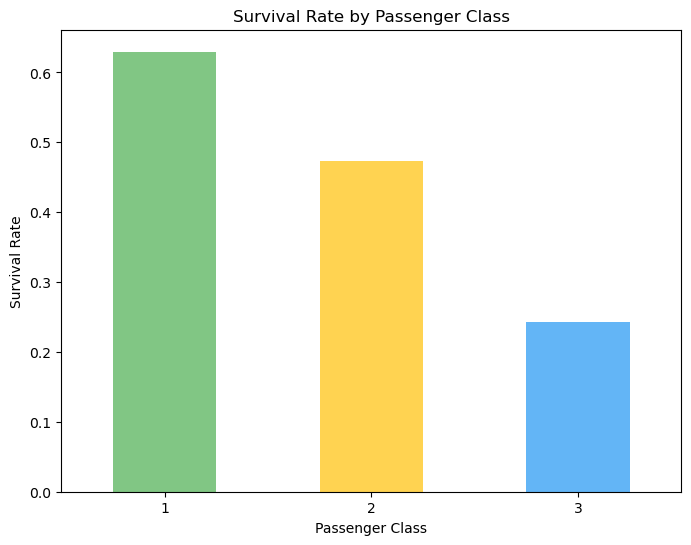

In [7]:
# Calculate survival rate by passenger class
survival_rate = dataset.groupby('Pclass')['Survived'].mean()

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
survival_rate.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3'], alpha=0.7)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

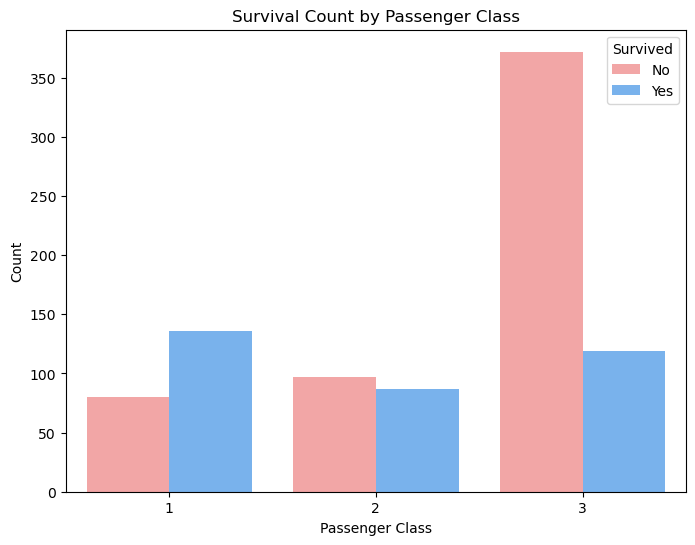

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Pclass', hue='Survived', palette=['#FF9999', '#66B2FF'])
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


## Analyzing Survival Rate
The graphs above shows that the survival rate was much higher for individuals in first class than for those in third class. However, when using it in V1, I forgot to allocate different variables and used 1,2,3. This meant that whatever algorithm I used, the value 3, due to it being higher than 2. This could have partially affected the results, which is why I might need to change the table. 

In [9]:
#Add Passenger class column in categorical format
pass_class = []
p_class = dataset['Pclass']
for p in p_class:
    if p == 1:
        class_ = 'First'
    elif p==2:
        class_ = 'Second'
    else:
        class_ = 'Third'
    pass_class.append(class_)
dataset['P_Class_Edit'] = pass_class

    

In [10]:
counts = dataset['Titles'].value_counts().sort_index()  # Sort by index (ascending by default)
print(counts)

Titles
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: count, dtype: int64


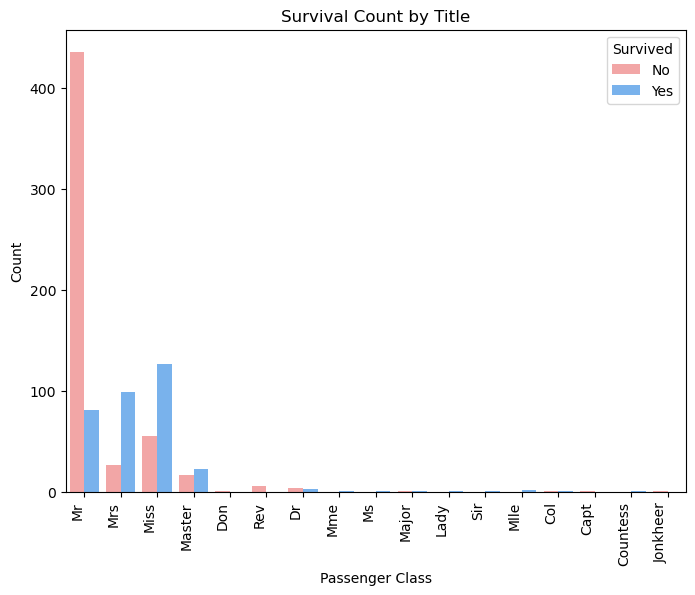

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Titles', hue='Survived', palette=['#FF9999', '#66B2FF'])
plt.title('Survival Count by Title')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.show()

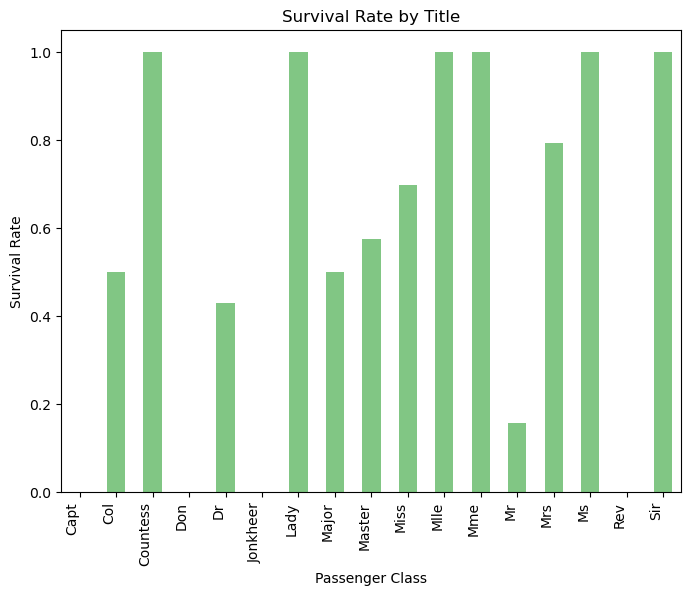

In [12]:
#Check to see if Title affected survival rate
survival_rate = dataset.groupby('Titles')['Survived'].mean()

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
survival_rate.plot(kind='bar', color=['#4CAF50'], alpha=0.7)
plt.title('Survival Rate by Title')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
# Adjust x-axis labels
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate and align labels for better readability

plt.show()

## Analysis
What is clear is that there are certain benefits to having certain Titles. For Mr., Mrs, and Miss, these are common people and their gender was the most defining feature in their survival. 
However, a countess, MMe, Colonel, and sir had a higher chance of survival. 
It is also important to note that the number of these royals is relatively small. 
What is clear is that women with a meaningful Title had a higher chance of survival. 
The normal titles are Mr. Mrs., Miss. and Master. The rest are uncommon. This allows me to create a new column called meaningful_title.


In [13]:
normal_titles = ["Mr", "Mrs", "Miss", "Master"]
dataset["strong_title"] = np.where(
    dataset['Titles'].isin(normal_titles), 0, 1
)
       

Had_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


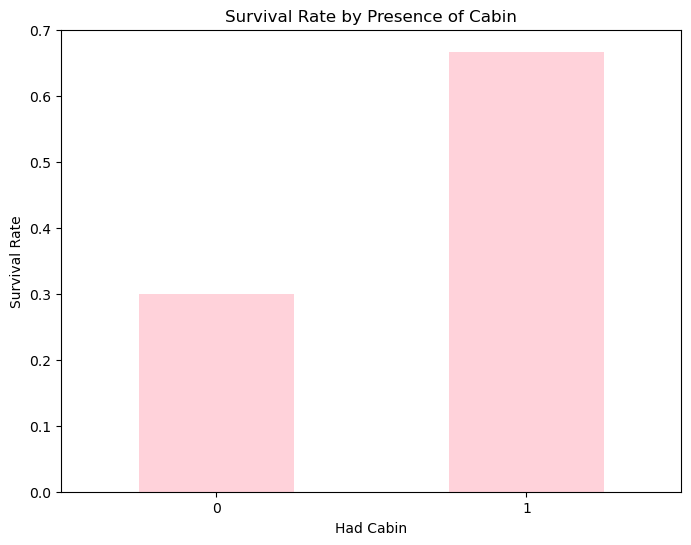

In [14]:
#Check to see if Having a Cabin affected survival rate
survival_rate = dataset.groupby('Had_Cabin')['Survived'].mean()
print(survival_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
survival_rate.plot(kind='bar', color=['pink'], alpha=0.7)
plt.title('Survival Rate by Presence of Cabin')
plt.xlabel('Had Cabin')
plt.ylabel('Survival Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, fontsize=10)  # Rotate and align labels for better readability

plt.show()

## Vitality of Cabin Presence
If a person had a cabin, then they had a good chance of survival. A lot more people who had cabins survived when compared to those who did not. 

In [15]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Had_Cabin,is_adult,P_Class_Edit,strong_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,Third,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,First,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,Third,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,First,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,Third,0


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


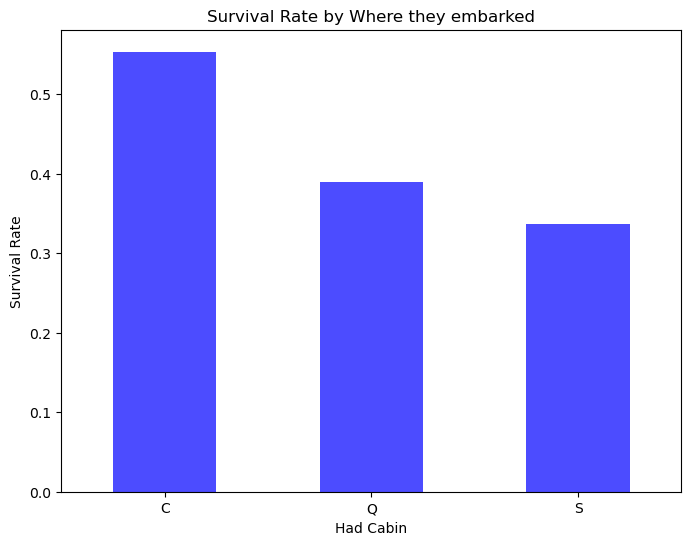

In [16]:
#Check to see Whether Where they boarded affected survival
#Check to see if Having a Cabin affected survival rate
survival_rate = dataset.groupby('Embarked')['Survived'].mean()
print(survival_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
survival_rate.plot(kind='bar', color=['blue'], alpha=0.7)
plt.title('Survival Rate by Where they embarked')
plt.xlabel('Had Cabin')
plt.ylabel('Survival Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, fontsize=10)  # Rotate and align labels for better readability

plt.show()

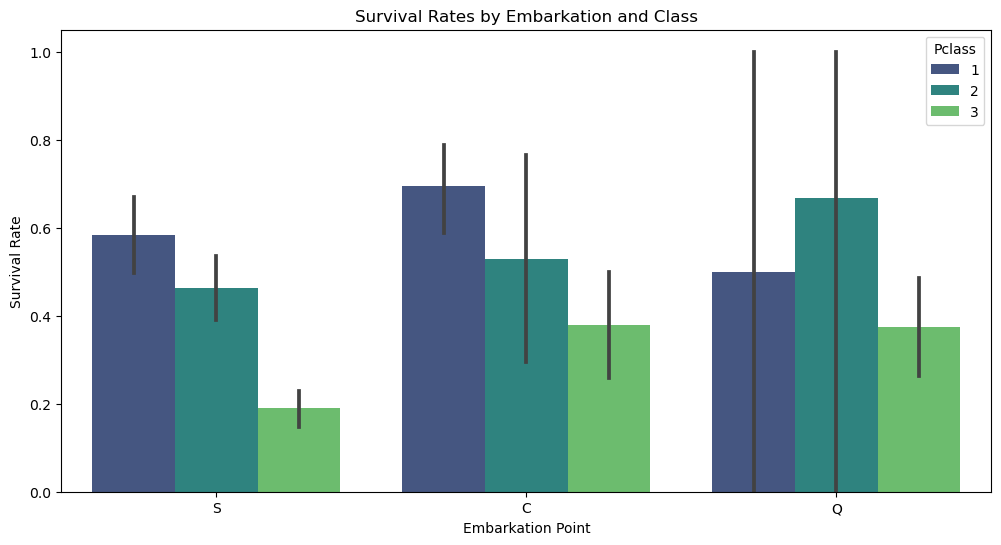

In [17]:
#Check to see Whether Where they boarded and class affected survival
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dataset,
    x="Embarked",
    y="Survived",
    hue="Pclass",
    palette="viridis",
    dodge=True
)

plt.title("Survival Rates by Embarkation and Class")
plt.ylabel("Survival Rate")
plt.xlabel("Embarkation Point")
plt.legend(title="Pclass")
plt.show()

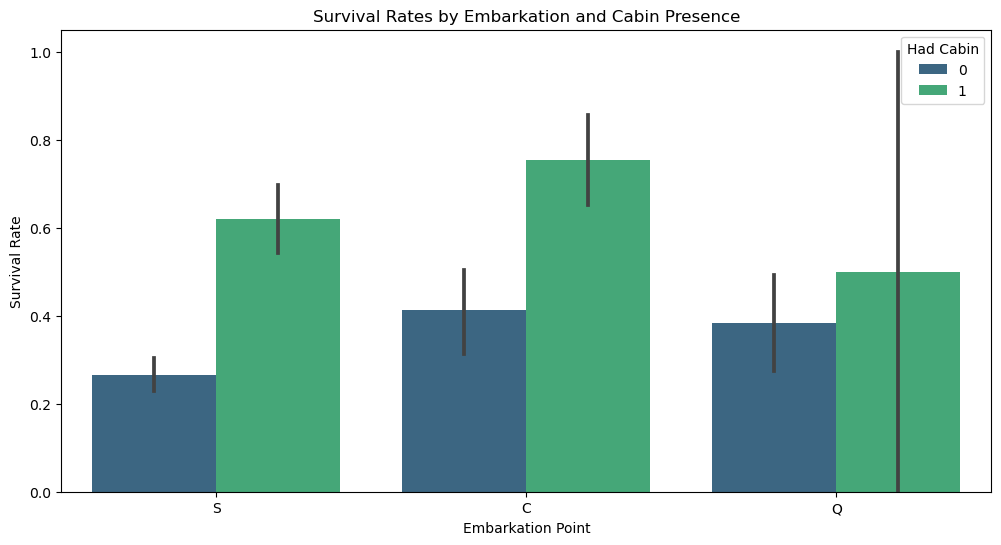

In [18]:
#Check to see Whether Where they boarded and cabin presence affected survival
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dataset,
    x="Embarked",
    y="Survived",
    hue="Had_Cabin",
    palette="viridis",
    dodge=True
)

plt.title("Survival Rates by Embarkation and Cabin Presence")
plt.ylabel("Survival Rate")
plt.xlabel("Embarkation Point")
plt.legend(title="Had Cabin")
plt.show()

## Where Embarked Analysis
As discovered earlier, class has a huge impact on survival, with more passangers in first class surviving than in any other class. The reason why Cherbourg features a high survival rate can be attributed to the fact that it has a lot of first class passengers compared to the passangers from other classes. Queenstown features more third class passengers, lowering its survival rate. However, a lot of second class passengers who embarked in Queensland survived, as seen by the high survival rate. 
Southamption also has a lot of third and second class passengers, lowering the rate. 

The factors affecting survival rate go beyond embarkation, which is why I believe I will drop this column. 

## Addressing SibSp and parch
instead of checking whether the person had sibsp or parent/child, I will create two new columns checking for the presence of both. 

In [19]:
#whether they had a sibling or spouse
sibsp_presence = []
sibsp = dataset['SibSp']
for ss in sibsp:
    if ss > 0:
        presence = 1
    elif ss == 0:
        presence = 0
    else:
        presence = "null"
    sibsp_presence.append(presence)

dataset["sibsp_presence"] = sibsp_presence
dataset["sibsp_presence"].value_counts().sort_index()


sibsp_presence
0    608
1    283
Name: count, dtype: int64

In [20]:
#whether they had a parent or child
parch_presence = []
parch = dataset['Parch']
for pch in parch:
    if pch > 0:
        presence = 1
    elif pch == 0:
        presence = 0
    else:
        presence = "null"
    parch_presence.append(presence)

dataset["parch_presence"] = parch_presence
dataset["parch_presence"].value_counts().sort_index()


parch_presence
0    678
1    213
Name: count, dtype: int64

sibsp_presence
0    0.345395
1    0.466431
Name: Survived, dtype: float64


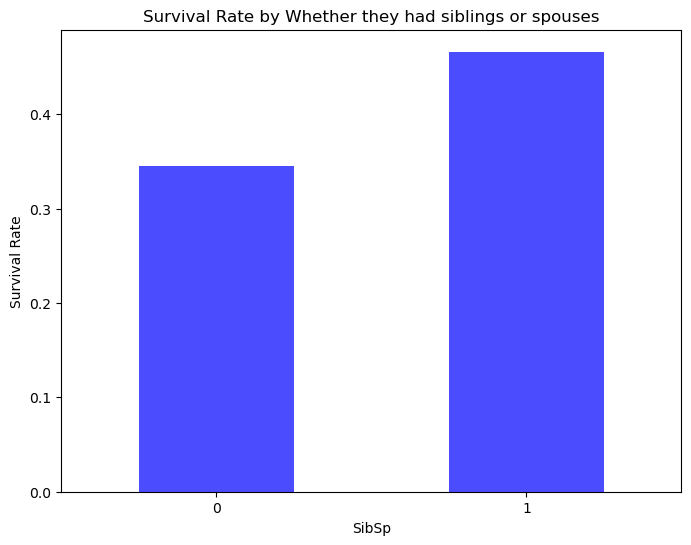

In [21]:
## Check to see whether having a sibling or spouse influenced survival
survival_rate = dataset.groupby('sibsp_presence')['Survived'].mean()
print(survival_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
survival_rate.plot(kind='bar', color=['blue'], alpha=0.7)
plt.title('Survival Rate by Whether they had siblings or spouses')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, fontsize=10)  # Rotate and align labels for better readability

plt.show()

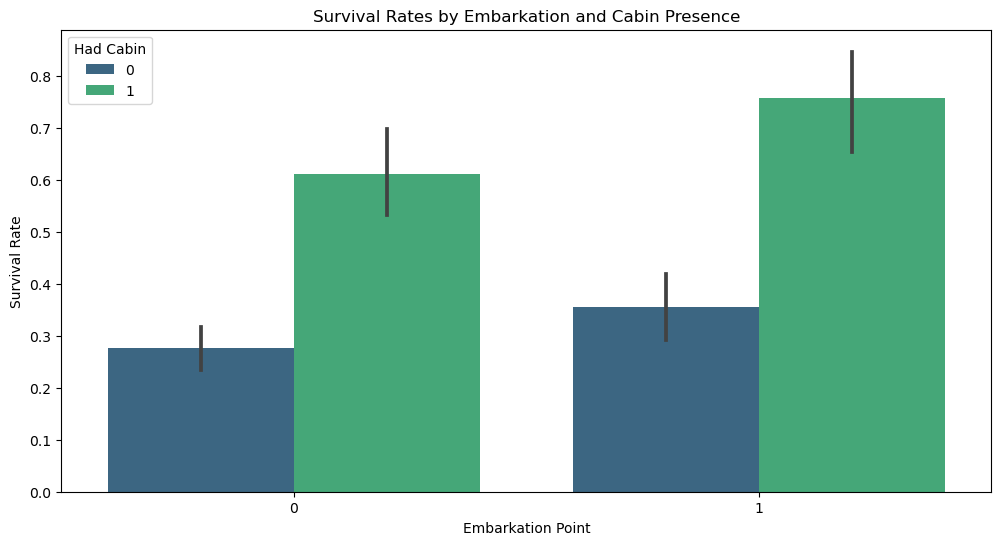

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dataset,
    x="sibsp_presence",
    y="Survived",
    hue="Had_Cabin",
    palette="viridis",
    dodge=True
)

plt.title("Survival Rates by Embarkation and Cabin Presence")
plt.ylabel("Survival Rate")
plt.xlabel("Embarkation Point")
plt.legend(title="Had Cabin")
plt.show()

In [23]:
# Group by sibsp_presence and Pclass, then calculate survival rates
class_distribution_survival_rate_class = dataset.groupby(["sibsp_presence", "Pclass"])["Survived"].mean()
class_distribution_survival_rate_cabin= dataset.groupby(["sibsp_presence", "Had_Cabin"])["Survived"].mean()
print(class_distribution_survival_rate_class)
print(class_distribution_survival_rate_cabin)

sibsp_presence  Pclass
0               1         0.562044
                2         0.416667
                3         0.236467
1               1         0.746835
                2         0.578125
                3         0.257143
Name: Survived, dtype: float64
sibsp_presence  Had_Cabin
0               0            0.275934
                1            0.611111
1               0            0.356098
                1            0.756410
Name: Survived, dtype: float64


## Analysis
Having a sibling added onto the factors presented. If someone had a sibling, regardless of class or whether they had a cabin, they had a higher chance of survival compared to someone of a similar class. 

parch_presence
0    0.343658
1    0.511737
Name: Survived, dtype: float64


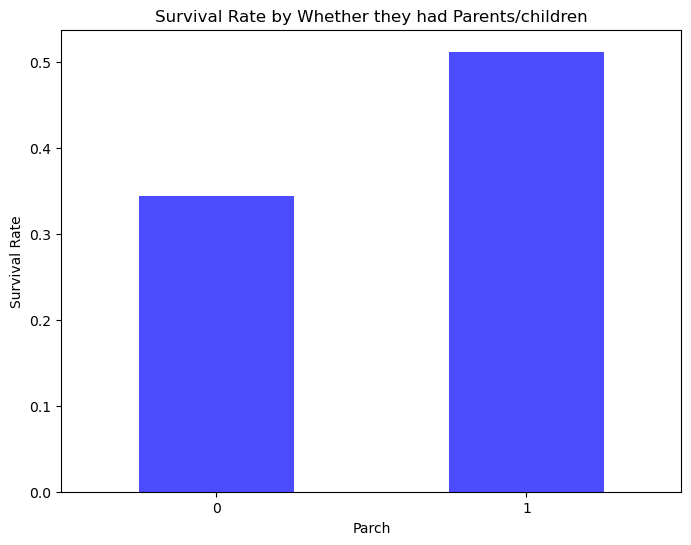

In [24]:
## Check to see whether having a parent/child influenced survival
survival_rate = dataset.groupby('parch_presence')['Survived'].mean()
print(survival_rate)
# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
survival_rate.plot(kind='bar', color=['blue'], alpha=0.7)
plt.title('Survival Rate by Whether they had Parents/children')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
# Adjust x-axis labels
plt.xticks(rotation=0, fontsize=10)  # Rotate and align labels for better readability

plt.show()

In [25]:
class_distribution = dataset.groupby("parch_presence")["Pclass"].value_counts()
print(class_distribution)

parch_presence  Pclass
0               3         381
                1         163
                2         134
1               3         110
                1          53
                2          50
Name: count, dtype: int64


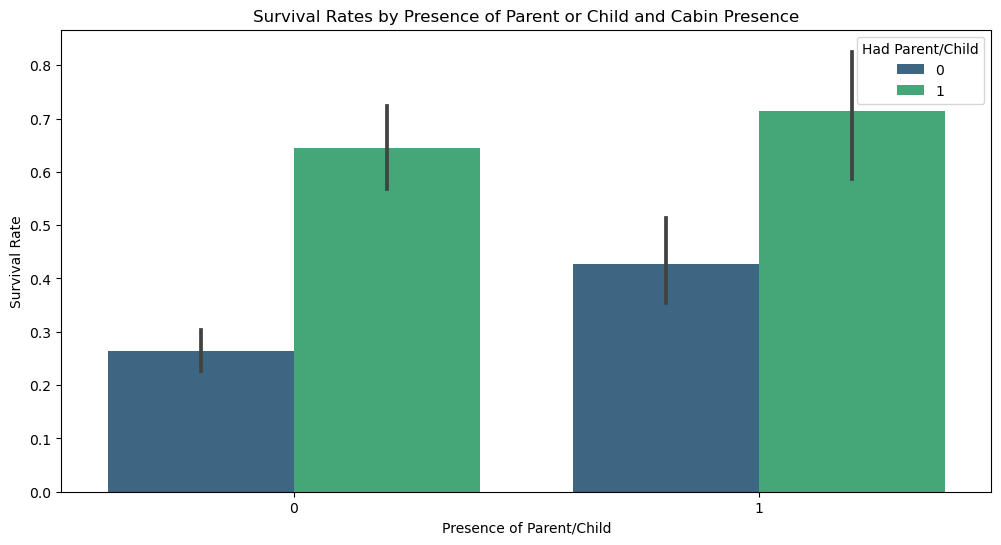

In [28]:
# Check to see if parental pre
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dataset,
    x="parch_presence",
    y="Survived",
    hue="Had_Cabin",
    palette="viridis",
    dodge=True
)

plt.title("Survival Rates by Presence of Parent or Child and Cabin Presence")
plt.ylabel("Survival Rate")
plt.xlabel("Presence of Parent/Child")
plt.legend(title="Had Parent/Child")
plt.show()

In [29]:
# Group by parch_presence and Pclass, then calculate survival rates
class_distribution_survival_rate_class = dataset.groupby(["parch_presence", "Pclass"])["Survived"].mean()
class_distribution_survival_rate_cabin= dataset.groupby(["parch_presence", "Had_Cabin"])["Survived"].mean()
print(class_distribution_survival_rate_class)
print(class_distribution_survival_rate_cabin)

parch_presence  Pclass
0               1         0.607362
                2         0.358209
                3         0.225722
1               1         0.698113
                2         0.780000
                3         0.300000
Name: Survived, dtype: float64
parch_presence  Had_Cabin
0               0            0.264432
                1            0.645390
1               0            0.426667
                1            0.714286
Name: Survived, dtype: float64


## Analysis
Having a child or a parent on board, can significantly increase your chances of survival, as seen on the impact it has on survival rates when combined with factors such as class and cabin crew. 

In [30]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Had_Cabin,is_adult,P_Class_Edit,strong_title,sibsp_presence,parch_presence
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,1,Third,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,First,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,Third,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,First,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,Third,0,0,0


## Conclusion
This analysis gives me the right columns that I need to work with to increase the chances of my results. 
The columns are: survived, sex, had_cabin, is_adult, p_class_edit, strong_title, sibsp_presence, and parch_presence, 
